In [19]:
# imports 

import pandas as pd
import numpy as np
import plotly as plt
import re
import plotly.express as px
import statistics
import scipy.stats as st

import pylab
import plotly.io as pio
import plotly.graph_objects as go
from textblob import TextBlob


In [20]:
def snake_case(s):
  return '_'.join(
    re.sub('([A-Z][a-z]+)', r' \1',
    re.sub('([A-Z]+)', r' \1',
    s.replace('-', ' '))).split()).lower()

In [21]:
q_raw_results = pd.ExcelFile('results/results.xlsx')

In [22]:
q_file = pd.read_excel('results/questionnaires.xlsx')
q_file

,question_id,questionnaire_id,keyword,question,generated_by
0,778,1,Brexit,Do you agree with the Brexit result?,human
1,620,1,Exams,Are you in favor of exams starting at a specif...,gpt3
2,845,1,Premier league,Who do you think will win the Premier League t...,human
3,87,1,Womens football,Do you think that women's football is a sport ...,gpt3
4,178,1,Kanye West,What is your opinion on Kanye West?,gpt3
...,...,...,...,...,...
295,163,10,Ghosts,Do you believe in ghosts?,gpt3
296,68,10,Exams,What is your opinion on exams?,gpt3
297,684,10,Influencers,Is influencer a real job?,human
298,737,10,Batgirl,Did you ever see a Batgirl comic?,human


In [23]:
# Processing questionnaire data into a dataframe
num_respondants = 0
q_full_results = pd.DataFrame()
q_meta_responses = pd.DataFrame()

for sheet_name in q_raw_results.sheet_names:
    q_id = int(re.search(r'form_responses_(\d+)', snake_case(sheet_name)).group(1))
    
    df = q_raw_results.parse(sheet_name)
    df.columns = df.columns.str.strip()
    df = df.drop(['Timestamp', 'Score'], axis=1)
    df  = df.T
    df.index.name = 'question'
    df = df.reset_index()
        
    responses = df.columns.values.tolist()
    responses.remove('question')
    response_df = pd.DataFrame()

    for response_value in responses:
        num_respondants += 1
        new = pd.DataFrame()

        new['response'] = df[response_value].map(lambda x: 'human' if x == 'Human' else ('gpt3' if x == 'Computer' else (x.lower() if isinstance(x, str) else x)))
        new['question'] = df['question']
        new['respondant_id'] = num_respondants
        new['questionnaire_id'] = q_id
        
        response_df = pd.concat([response_df, new]).reset_index(drop=True)
        
    if not response_df.empty:
        q_meta_df = response_df.query('question == "Have you heard of GPT-3 before?" | question == "Please rate your understanding of how language models, such as GPT-3 work?"')
        response_df = response_df[~response_df.isin(q_meta_df)].dropna(how = 'all')
        response_df['respondant_id'] = response_df['respondant_id'].astype('int32')
        response_df['questionnaire_id'] = response_df['questionnaire_id'].astype('int32')
        
        q_meta_responses = pd.concat([q_meta_responses, q_meta_df]).reset_index(drop=True)
        q_full_results = pd.concat([q_full_results, response_df]).reset_index(drop=True)

q_raw_results.close()
q_full_results

,response,question,respondant_id,questionnaire_id
0,human,Do you agree with the Brexit result?,1,1
1,human,Are you in favor of exams starting at a specif...,1,1
2,human,Who do you think will win the Premier League t...,1,1
3,gpt3,Do you think that women's football is a sport ...,1,1
4,gpt3,What is your opinion on Kanye West?,1,1
...,...,...,...,...
627,gpt3,Do you believe in ghosts?,21,10
628,gpt3,What is your opinion on exams?,21,10
629,human,Is influencer a real job?,21,10
630,gpt3,Did you ever see a Batgirl comic?,21,10


In [24]:
q_meta_responses

,response,question,respondant_id,questionnaire_id
0,no,Have you heard of GPT-3 before?,1,1
1,1,Please rate your understanding of how language...,1,1
2,no,Have you heard of GPT-3 before?,2,1
3,1,Please rate your understanding of how language...,2,1
4,no,Have you heard of GPT-3 before?,3,2
5,1,Please rate your understanding of how language...,3,2
6,no,Have you heard of GPT-3 before?,4,2
7,1,Please rate your understanding of how language...,4,2
8,yes,Have you heard of GPT-3 before?,5,3
9,4,Please rate your understanding of how language...,5,3


In [25]:

q_merged = q_file.merge(q_full_results, on=['question', 'questionnaire_id']).reset_index(drop=True)

failed_merges = q_file.merge(q_full_results, how='left', on=['question', 'questionnaire_id']).reset_index(drop=True)
failed_merges[failed_merges.isna().any(axis=1)]

,question_id,questionnaire_id,keyword,question,generated_by,response,respondant_id


In [26]:
q_merged['correct'] = q_merged.apply(lambda x: True if x['generated_by'] == x['response'] else False, axis=1)
q_merged

,question_id,questionnaire_id,keyword,question,generated_by,response,respondant_id,correct
0,778,1,Brexit,Do you agree with the Brexit result?,human,human,1,True
1,778,1,Brexit,Do you agree with the Brexit result?,human,human,2,True
2,620,1,Exams,Are you in favor of exams starting at a specif...,gpt3,human,1,False
3,620,1,Exams,Are you in favor of exams starting at a specif...,gpt3,gpt3,2,True
4,845,1,Premier league,Who do you think will win the Premier League t...,human,human,1,True
...,...,...,...,...,...,...,...,...
625,684,10,Influencers,Is influencer a real job?,human,human,21,True
626,737,10,Batgirl,Did you ever see a Batgirl comic?,human,gpt3,20,False
627,737,10,Batgirl,Did you ever see a Batgirl comic?,human,gpt3,21,False
628,243,10,Dating apps,Do you think dating apps are a good way to mee...,gpt3,human,20,False


In [27]:
# Descriptives of the data

respondant_scores = q_merged[q_merged['correct']][['respondant_id', 'correct']]\
                    .groupby('respondant_id')\
                    .sum()\
                    .rename(columns={'correct': 'score'})
print('#########################################################')
print(respondant_scores)
print('#########################################################')
print(f'min score: {int(np.min(respondant_scores, axis=0))}')
print(f'max score: {int(np.max(respondant_scores, axis = 0))}')
print(f'average score: {np.average(respondant_scores)}')
print(f'99%: {np.percentile(respondant_scores, 99)}')
print(f'95%: {np.percentile(respondant_scores, 95)}')
print(f'90%: {np.percentile(respondant_scores, 90)}')
print(f'75%: {np.percentile(respondant_scores, 75)}')
print(f'60%: {np.percentile(respondant_scores, 60)}')
print(f'50%: {np.percentile(respondant_scores, 50)}')
print(f'25%: {np.percentile(respondant_scores, 25)}')
print(f'10%: {np.percentile(respondant_scores, 10)}')
print('#########################################################')

#########################################################
               score
respondant_id       
1                 20
2                 14
3                 15
4                 19
5                 14
6                 14
7                 13
8                 15
9                 15
10                15
11                19
12                17
13                15
14                18
15                16
16                13
17                11
18                21
19                17
20                16
21                19
#########################################################
min score: 11
max score: 21
average score: 16.0
99%: 20.8
95%: 20.0
90%: 19.0
75%: 18.0
60%: 16.0
50%: 15.0
25%: 14.0
10%: 13.0
#########################################################


In [28]:
# Average score on each questionnaire types
questionnaire_average_scores = q_merged[['respondant_id', 'questionnaire_id', 'correct']]\
                    .groupby(['respondant_id', 'questionnaire_id'])\
                    .apply(lambda group: sum(group['correct']))\
                    .groupby('questionnaire_id')\
                    .mean()

print('#########################################################')
print(questionnaire_average_scores)
print('#########################################################')

#########################################################
questionnaire_id
1     17.0
2     17.0
3     14.0
4     13.0
5     15.0
6     16.8
7     16.0
8     12.0
9     19.0
10    17.5
dtype: float64
#########################################################


In [29]:
total_gpt3 = q_merged.query('generated_by == "gpt3"').shape[0]
total_human = q_merged.query('generated_by == "human"').shape[0]

# Question types, as raw counts and percentages 

num_identified_gpt3 = q_merged.query('generated_by == "gpt3" and response == "gpt3"').shape[0]
print(f'Correctly identified as gpt3: {num_identified_gpt3} - {(num_identified_gpt3/total_gpt3) * 100}%')                  

num_misidentified_gpt3 = q_merged.query('generated_by == "human" and response == "gpt3"').shape[0]
print(f'Incorrectly idenfitied as gpt3: {num_misidentified_gpt3} - {(num_misidentified_gpt3/total_human) * 100}%')

num_identified_human = q_merged.query('generated_by == "human" and response == "human"').shape[0]
print(f'Correctly identified as human: {num_identified_human} - {(num_identified_human/total_human) * 100}%')

num_misidentified_human = q_merged.query('generated_by == "gpt3" and response == "human"').shape[0]
print(f'Incorrectly identified as human: {num_misidentified_human} - {(num_misidentified_human/total_gpt3) * 100}%')

Correctly identified as gpt3: 152 - 48.25396825396825%
Incorrectly idenfitied as gpt3: 131 - 41.58730158730159%
Correctly identified as human: 184 - 58.41269841269842%
Incorrectly identified as human: 163 - 51.746031746031754%


In [30]:
# Total number of correct and incorrect questions answered 
print(f"Out of 600, participants got {q_merged.query('correct == True').shape[0]} questions correct and {q_merged.query('correct == False').shape[0]} questions incorrect")

Out of 600, participants got 336 questions correct and 294 questions incorrect


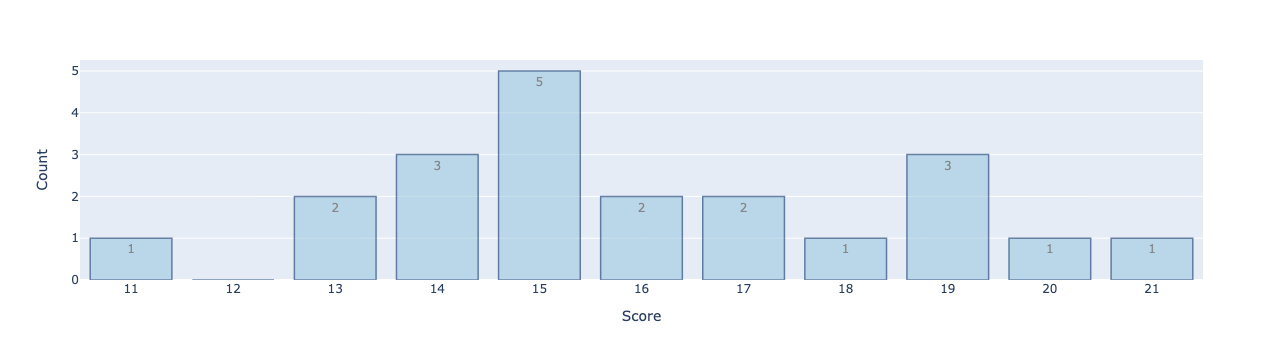

In [31]:
# Distribution of score counts 
# Generating Data 
long = {'Score': [11, 13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 18,19, 19, 19, 20, 21]}
long = pd.DataFrame(data=long)
short = {'Score': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'Count': [1, 0, 2, 3, 5, 2, 2, 1, 3, 1, 1]}
short = pd.DataFrame(data=short)
fig = px.bar(short, x = 'Score', y = 'Count', orientation = 'v',  text_auto='2s')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_xaxes(type='category')

In [32]:

def set_confusion(df: pd.DataFrame):
    if df['generated_by'] == 'gpt3' and df['response'] == 'gpt3':
        return 'True positive'
    if df['generated_by'] == 'human' and df['response'] == 'human':
        return 'True negative'
    if df['generated_by'] == 'human' and df['response'] == 'gpt3':
        return 'False positive'
    else:
        return 'False negative'

# confusion matrix 

true_positive = q_merged.query('generated_by == "gpt3" and response == "gpt3"').shape[0]
print(f'Number of True Positives = {true_positive}')
true_negative = q_merged.query('generated_by == "human" and response == "human"').shape[0]
print(f'Number of True Negatives = {true_negative}')
false_positive = q_merged.query('generated_by == "human" and response == "gpt3"').shape[0]
print(f'Number of False Positives = {false_positive}')
false_negative = q_merged.query('generated_by == "gpt3" and response == "human"').shape[0]
print(f'Number of False Negatives = {false_negative}')



q_merged['confusion'] = q_merged.apply(set_confusion, axis=1)
q_merged['confusion']


Number of True Positives = 152
Number of True Negatives = 184
Number of False Positives = 131
Number of False Negatives = 163


0       True negative
1       True negative
2      False negative
3       True positive
4       True negative
            ...      
625     True negative
626    False positive
627    False positive
628    False negative
629     True positive
Name: confusion, Length: 630, dtype: object

In [34]:
# How many times did participants choose Human? 
print('How many times did participants choose human?')
total = 630
choose_human = q_merged.query('response == "human"').shape[0]
print(f'{choose_human} = {choose_human/total * 100}%')

# How many times did participants choose GPT-3? 
print('How many times did participants choose GPT-3?')
choose_gpt3 = q_merged.query('response == "gpt3"').shape[0]
print(f'{choose_gpt3} = {choose_gpt3/total * 100}%')

How many times did participants choose human?
347 = 55.07936507936508%
How many times did participants choose GPT-3?
283 = 44.920634920634924%


In [ ]:
# Accuracy 

accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f"Accuracy = {round(accuracy, 3)}")

In [35]:
# Error Rate 

error = (false_positive + false_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f"Error Rate = {round(error, 3)}")

Error Rate = 0.467


In [36]:
# Sensitivity 

sensitivity = true_positive/(true_positive + false_negative)
print(f"Sensitivity = {round(sensitivity, 3)}")


Sensitivity = 0.483


In [37]:
# Specificity 

specificity = true_negative / (true_negative + false_positive)
print(f"Specificity = {round(specificity, 3)}")

Specificity = 0.584


In [38]:
# Precision  
precision = true_positive / (true_positive + false_positive)
print(f"Precision = {round(precision, 3)}")

Precision = 0.537


In [39]:
# False Positive Rate 

false_positive_rate = false_positive / (true_negative + false_positive)
print(f"False Positive Rate = {round(false_positive_rate, 3)}")

False Positive Rate = 0.416


In [40]:

# Shapiro-Wilk test
from scipy.stats import shapiro

stat, p = shapiro(long['Score'])

print('stat=%.3f, p%.3f\n ' % (stat, p))
if p > 0.05:
  print('Fail to reject the null, probably normal')
else: 
    print('Reject the null, probably not normal') 


stat=0.963, p0.584
 
Fail to reject the null, probably normal


In [41]:
# Standard deviation 
statistics.stdev(respondant_scores['score'])

2.588435821108957

In [42]:
# Standard deviation 
statistics.stdev(respondant_scores['score'])
# Confidence intervals 
conf_95_interval = st.t.interval(alpha=0.95, df=len(respondant_scores)-1, loc=np.mean(respondant_scores['score']), scale=st.sem(respondant_scores['score'])) 
print(conf_95_interval)

(14.82175814043398, 17.178241859566022)


/var/folders/xz/633t8rl91gv2nrg4bvd71cxw0000gn/T/ipykernel_32066/1776248612.py:4: DeprecationWarning:

Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.



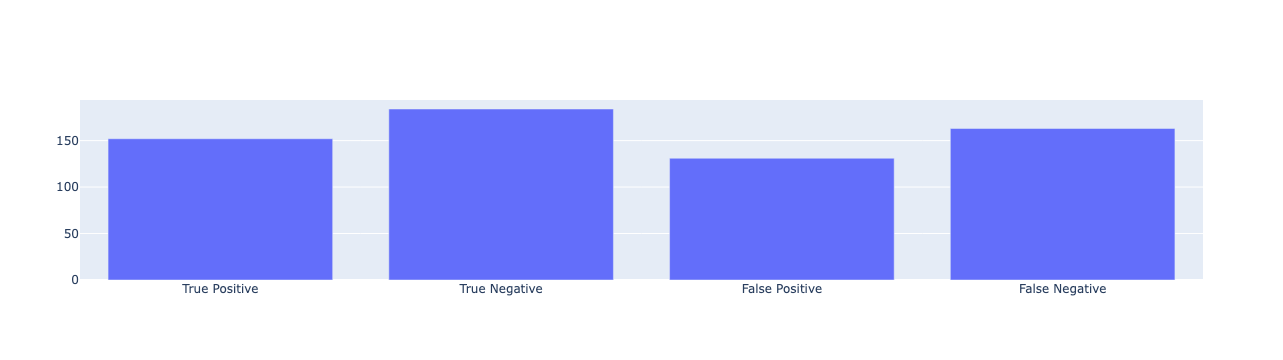

In [43]:
# Response Types 

fig = dict({
    "data": [{"type": "bar",
              "x": ['True Positive', 'True Negative', 'False Positive', 'False Negative'],
              "y": [152, 184, 131, 163]}],
    "layout": {"title": {"text": " "}}
})

pio.show(fig)


        confusion    counts                    
                       mean       std       sem
0  False negative  7.761905  2.547641  0.555941
1  False positive  6.238095  2.119074  0.462420
2   True negative  8.761905  2.119074  0.462420
3   True positive  7.238095  2.547641  0.555941
        confusion      mean       std       sem
0  False negative  7.761905  2.547641  0.555941
1  False positive  6.238095  2.119074  0.462420
2   True negative  8.761905  2.119074  0.462420
3   True positive  7.238095  2.547641  0.555941


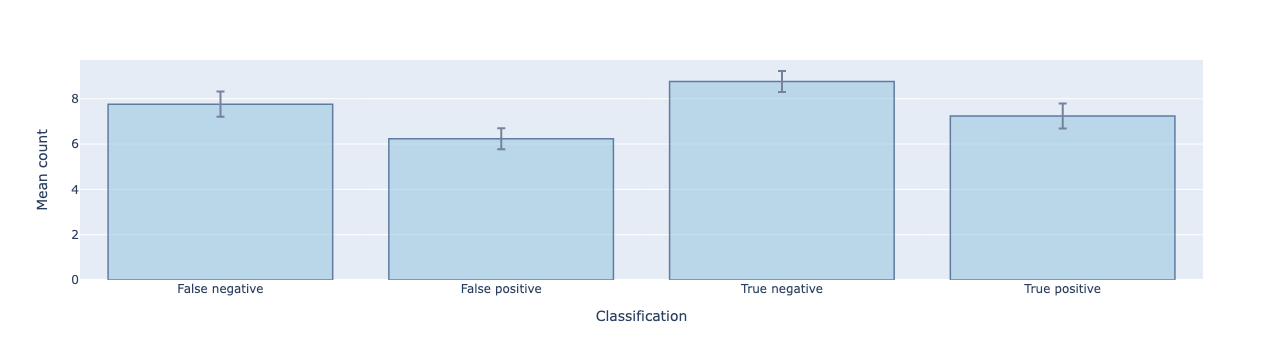

In [44]:
# Response Types with Error Bars 


q_confusion = q_merged[['respondant_id', 'confusion']]\
                    .groupby(['respondant_id', 'confusion'])\
                    .size()\
                    .reset_index(name='counts')\
                    .groupby(['confusion'])\
                    .agg({'counts': ['mean', 'std', 'sem']})\
                    .reset_index()
print(q_confusion)
#new['confusion'] = q_confusion['confusion']
q_confusion.columns = q_confusion.columns.droplevel()
q_confusion = q_confusion.rename(columns={'':'confusion'})


print(q_confusion)

fig = px.bar(
    q_confusion,
    x='confusion',
    y='mean',
    error_y='sem',
    labels={
        'confusion': 'Classification',
        'mean': 'Mean count',
        'false_negative': 'False negative',
        'false_positive': 'False positive',
        'true_negative': 'True negative',
        'true_positive': 'True positive'
    }
)
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)
fig.show()

In [45]:
# CI accuracy
print(st.t.interval(alpha=0.95, df=len(q_merged)-1, loc=336))


(334.0362573747987, 337.9637426252013)


/var/folders/xz/633t8rl91gv2nrg4bvd71cxw0000gn/T/ipykernel_32066/1886951385.py:2: DeprecationWarning:

Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.



In [ ]:
# CI error
print(st.t.interval(alpha=0.95, df=len(q_merged)-1, loc=q_merged.query('correct == False').shape[0]))

In [ ]:
# CI false positive 
print(st.t.interval(alpha=0.95, df=len(q_merged)-1, loc=q_merged.query('correct == False').shape[0]))

In [ ]:
q_merged['sentiment'] = q_merged['question'].apply(lambda q: TextBlob(q).sentiment.polarity)

In [ ]:
print(q_merged['sentiment'])

In [ ]:
computer = q_merged.query('generated_by == "gpt3"')
computer = computer['question']
human = q_merged.query('generated_by == "human"')
human = human['question']

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:

computer = q_merged.query('generated_by == "gpt3"')
computer = computer['question']
human = q_merged.query('generated_by == "human"')
human = human['question']
human_string = human.str.cat()
pc_string = computer.str.cat()
human_tb = TextBlob(human_string)


In [ ]:
pc_tb = TextBlob(pc_string)
len(pc_tb.word_counts)

In [ ]:
# Sentiment
# Take the sentiment of each question & then the mean over all questions 
print(f'Human sentiment is {human_tb.sentiment.polarity}')
print(f'Computer sentiment is {pc_tb.sentiment.polarity}')

In [ ]:
human_count = human_tb.word_counts
pc_count = pc_tb.word_counts

In [ ]:
pc_ordered_count = sorted(pc_count.items(), key = lambda x:x[1], reverse = True)
pc_ordered_count[:10]

In [ ]:
human_ordered_count = sorted(human_count.items(), key = lambda x:x[1], reverse = True)
human_ordered_count[:10]

In [ ]:
# Part of speech tagging
#nltk.download('averaged_perceptron_tagger')
#human_tb.tags
# count how many times each occurs? 


In [ ]:
#y = list(y)
count = {}
for x in human_tb.tags:
    if x in count:
        count[x] += 1
    else: count[x] = 1
print(count)

In [ ]:
# T-Test
x = st.ttest_1samp(a = respondant_scores['score'], popmean = 15)
print(x)
